# Analysis of Popular Spotify Playlists & Songs

In [1]:
# Dependencies and Setup
import base64
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import base64
import warnings
warnings.filterwarnings('ignore')
from requests.auth import HTTPBasicAuth
import scipy.stats as stats
from pprint import pprint
import seaborn as sns
%matplotlib inline

## Prepare Music Data
* Load Playlist and Track Data Files
* Create a Merged DataFrame for Analysis 

In [2]:
# Identify the csv data files to be read
playlist_data = "datasets/playlist_top_5_input.csv"
track_data = "datasets/playlist_top_5_output.csv"

# Read the playlist/genre and track data csv files into their DataFrames
playlist_data = pd.read_csv(playlist_data)
track_data = pd.read_csv(track_data)

# Combine the data into a single dataset, merge on playlist ID, unique ID
merged_music_data = pd.merge(playlist_data, track_data, on="Playlist ID", how="outer")

# Convert track duration from milliseconds to minutes with decimal, i.e 2 mins 30 seconds is 2.5 mins
merged_music_data["Track Duration"] = merged_music_data["Track Duration"]/60000

merged_music_data.head()

Name Genre             Playlist ID                Track ID  \
0  Today's Top Hits   Pop  37i9dQZF1DXcBWIGoYBM5M  6WrI0LAC5M1Rw2MnX2ZvEg   
1  Today's Top Hits   Pop  37i9dQZF1DXcBWIGoYBM5M  0sf12qNH5qcw8qpgymFOqD   
2  Today's Top Hits   Pop  37i9dQZF1DXcBWIGoYBM5M  4TnjEaWOeW0eKTKIEvJyCa   
3  Today's Top Hits   Pop  37i9dQZF1DXcBWIGoYBM5M  0nbXyq5TXYPCO7pr3N8S4I   
4  Today's Top Hits   Pop  37i9dQZF1DXcBWIGoYBM5M  2usxQITOSDqvkYiI0oIwao   

   Track Position         Track Name        Track Added At  Track Popularity  \
0               1    Don't Start Now  2020-02-03T05:01:00Z                97   
1               2    Blinding Lights  2020-02-03T05:01:00Z                98   
2               3            Falling  2020-02-03T05:01:00Z                97   
3               4            The Box  2020-02-03T05:01:00Z               100   
4               5  You should be sad  2020-02-03T05:01:00Z                88   

   Track Duration  Available Markets  ... Time Signature Acousticness  \
0        3.054833                 75  ...              4      0.01250   
1        3.359550                 79  ...              4      0.00147   
2        2.656350                 79  ...              4      0.12300   
3        3.277533                 78  ...              4      0.10400   
4        3.424550                  0  ...              4      0.14300   

  Danceability Energy  Instrumentalness  Liveness  Loudness  Speechiness  \
0        0.794  0.793          0.000000    0.0952    -4.521       0.0842   
1        0.513  0.796          0.000209    0.0938    -4.075       0.0629   
2        0.784  0.430          0.000000    0.0887    -8.756       0.0364   
3        0.896  0.586          0.000000    0.7900    -6.687       0.0559   
4        0.591  0.585          0.000000    0.1090    -6.350       0.0277   

   Valence    Tempo  
0    0.677  123.941  
1    0.345  171.017  
2    0.236  127.087  
3    0.642  116.971  
4    0.324  110.940  

[5 rows x 26 columns]

## ANOVA Box plot for Genre v Energy

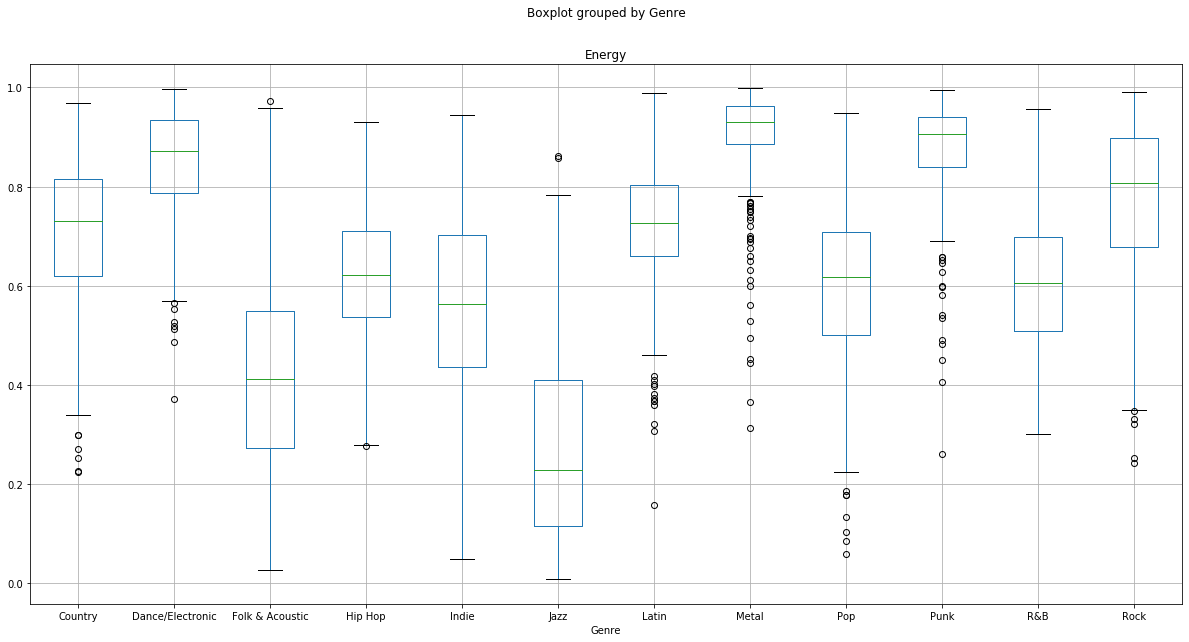

In [3]:
energy_df = merged_music_data[['Genre','Energy']]
energy_df.boxplot('Energy', by="Genre", figsize=(20, 10))

In [4]:
group1 = energy_df[energy_df["Genre"] == 'Country']['Energy']
group2 = energy_df[energy_df["Genre"] == 'Dance/Electronic']['Energy']
group3 = energy_df[energy_df["Genre"] == 'Folk & Acoustic']['Energy']
group4 = energy_df[energy_df["Genre"] == 'Hip Hop']['Energy']
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=661.1517391203486, pvalue=2.656756021047716e-276)

## ANOVA Box plot for Genre v Valence

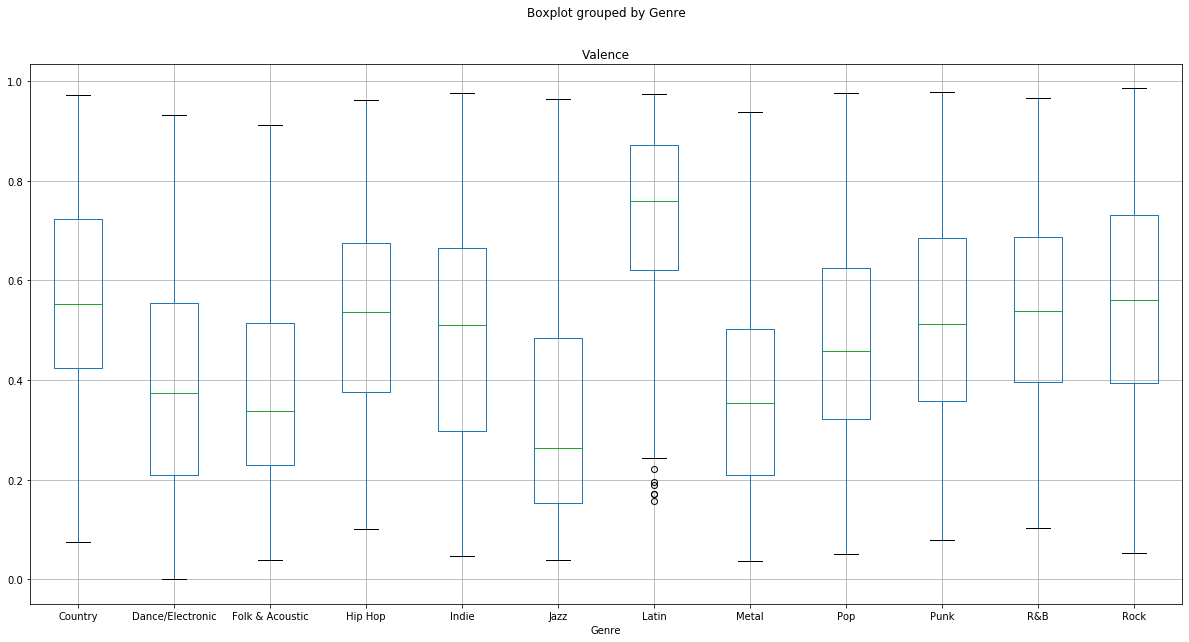

In [5]:
valence_df = merged_music_data[['Genre','Valence']]
valence_df.boxplot('Valence', by="Genre", figsize=(20, 10))

In [6]:
group1 = valence_df[valence_df["Genre"] == 'Country']['Valence']
group2 = valence_df[valence_df["Genre"] == 'Dance/Electronic']['Valence']
group3 = valence_df[valence_df["Genre"] == 'Folk & Acoustic']['Valence']
group4 = valence_df[valence_df["Genre"] == 'Hip Hop']['Valence']
group5 = valence_df[valence_df["Genre"] == 'Indie']['Valence']
group6 = valence_df[valence_df["Genre"] == 'Jazz']['Valence']
group7 = valence_df[valence_df["Genre"] == 'Latin']['Valence']
group8 = valence_df[valence_df["Genre"] == 'Metal']['Valence']
group9 = valence_df[valence_df["Genre"] == 'Pop']['Valence']
group10 = valence_df[valence_df["Genre"] == 'Punk']['Valence']
group11 = valence_df[valence_df["Genre"] == 'R&B']['Valence']
group12 = valence_df[valence_df["Genre"] == 'Rock']['Valence']

stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12)

F_onewayResult(statistic=103.02504522346725, pvalue=1.516797970932682e-209)

## ANOVA Box plot for Genre v Track Popularity

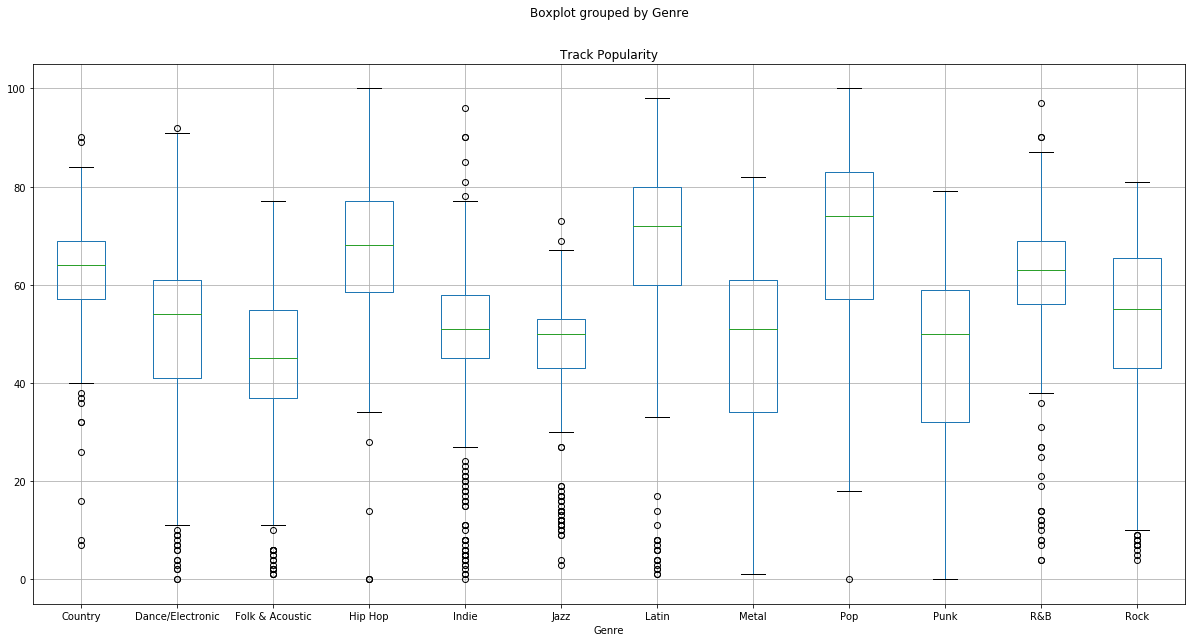

In [7]:
#Null hypothesis = there is no statistical significant difference
popularity_df = merged_music_data[['Genre','Track Popularity']]
#Create a boxplot to compare means
popularity_df.boxplot('Track Popularity', by="Genre", figsize=(20, 10))
plt.savefig("plots/Boxplot_Anova_Genre_Popularity.png", bbox_inches='tight', dpi=200)

In [42]:
#Extract individual groups
group1 = popularity_df[popularity_df["Genre"] == 'Country']['Track Popularity']
group2 = popularity_df[popularity_df["Genre"] == 'Dance/Electronic']['Track Popularity']
group3 = popularity_df[popularity_df["Genre"] == 'Folk & Acoustic']['Track Popularity']
group4 = popularity_df[popularity_df["Genre"] == 'Hip Hop']['Track Popularity']
group5 = popularity_df[popularity_df["Genre"] == 'Indie']['Track Popularity']
group6 = popularity_df[popularity_df["Genre"] == 'Jazz']['Track Popularity']
group7 = popularity_df[popularity_df["Genre"] == 'Latin']['Track Popularity']
group8 = popularity_df[popularity_df["Genre"] == 'Metal']['Track Popularity']
group9 = popularity_df[popularity_df["Genre"] == 'Pop']['Track Popularity']
group10 = popularity_df[popularity_df["Genre"] == 'Punk']['Track Popularity']
group11 = popularity_df[popularity_df["Genre"] == 'R&B']['Track Popularity']
group12 = popularity_df[popularity_df["Genre"] == 'Rock']['Track Popularity']

#Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12)

F_onewayResult(statistic=125.22327789111911, pvalue=1.5301647268872108e-250)

In [43]:
#Pull Hip Hop Popularity data from Popularity DataFrame and calculate mean
hip_hop_popuarity = popularity_df[popularity_df['Genre'] == 'Hip Hop']
hip_hop_popuarity.mean()

#Pull Folk & Acoustic Popularity data from Popularity DataFrame and calculate mean
folk_popuarity = popularity_df[popularity_df['Genre'] == 'Folk & Acoustic']
folk_popuarity.mean()

#Convert Hip Pop Popularity and Folk & Acoustic Popularity dataframes to lists 
hh_popularity_list = hip_hop_popuarity['Track Popularity'].tolist()
folk_popularity_list = folk_popuarity['Track Popularity'].tolist()

#Perform Ttest
stats.ttest_ind(hh_popularity_list, folk_popularity_list, equal_var=False)

Ttest_indResult(statistic=20.947420774258585, pvalue=7.42383694590656e-77)

In [44]:
#Pull Jazz Popularity data from Popularity DataFrame and calculate mean
jazz_popuarity = popularity_df[popularity_df['Genre'] == 'Jazz']
jazz_popuarity.mean()

#Pull Latin Popularity data from Popularity DataFrame and calculate mean
latin_popuarity = popularity_df[popularity_df['Genre'] == 'Latin']
latin_popuarity.mean()

#Convert Jazz Popularity and Latin Popularity dataframes to lists 
jazz_popularity_list = jazz_popuarity['Track Popularity'].tolist()
latin_popularity_list = latin_popuarity['Track Popularity'].tolist()

#Perform Ttest
stats.ttest_ind(jazz_popularity_list, latin_popularity_list, equal_var=False)

Ttest_indResult(statistic=-18.424354363957683, pvalue=3.658805541691308e-62)

In [11]:
grouped_valence_df = valence_df.groupby(['Genre'])
# grouped_valence_df.head()

hip_hop_valence = valence_df[valence_df['Genre'] == 'Hip Hop']
hip_hop_valence.mean()

country_valence = valence_df[valence_df['Genre'] == 'Country']
country_valence.mean()

stats.ttest_ind(hip_hop_valence.mean(), country_valence.mean(), equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)

## Does the Position/Rank of a Song in a Playlist impact it's Popularity? 

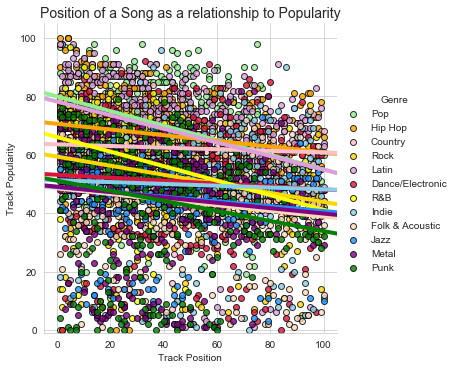

In [12]:
# Establish color dictionary for each genre
color_dict = dict({'Country': "Pink",
                   'Dance/Electronic': "Crimson",
                   'Folk & Acoustic': "Peachpuff",
                   'Hip Hop': "Orange",
                   'Indie': "skyblue",
                   'Jazz': "dodgerblue",
                   'Latin': "plum",
                   'Metal': "purple",
                   'Pop': "lightgreen",
                   'Punk': "green",
                   'R&B': "yellow",
                   'Rock': "gold"
                  })

# set gridmarks 
sns.set_style('whitegrid')

# create basic scatterplot
fig = sns.lmplot( x="Track Position", y="Track Popularity", hue="Genre", data=merged_music_data, palette=color_dict, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={"lw":4})
plt.title("Position of a Song as a relationship to Popularity", size=14)

# Set axis limits
plt.ylim(-1, 105)
plt.xlim(-5, 105)

# Show plot
plt.show()

# Save plot
fig.savefig("plots/Genre_Track_Position_Popularity.png", dpi=200)

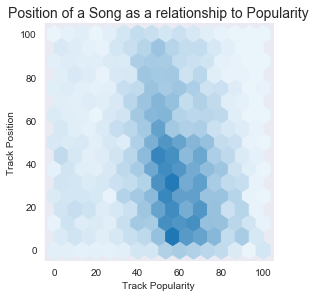

In [49]:
#Define hexbin
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
# establish hexbin heat map for duration and popularity
with sns.axes_style("dark"):
    g = sns.FacetGrid(merged_music_data, height=4)
g.map(hexbin, "Track Popularity", "Track Position", extent=[0, 100, 0, 100]);
plt.title("Position of a Song as a relationship to Popularity", size=14)
#Save output figure
g.savefig("plots/Track_Position_Popularity_Hex.png", dpi=200)

### Song Position vs Popularity for the Hip-Hop Genre

In [14]:
# Group by genre and track position, mean taken for all tracks in that given track position
gen_play = merged_music_data.groupby(['Genre', 'Track Position']).mean()
gen_play = gen_play.reset_index()
# Limit to Hip Hop only for graphing trends
gen_play = gen_play[gen_play['Genre']=='Hip Hop']
# Display the df
gen_play.head()

Genre  Track Position  Track Popularity  Track Duration  \
300  Hip Hop               1             83.25        3.286379   
301  Hip Hop               2             53.25        3.349508   
302  Hip Hop               3             77.00        3.540467   
303  Hip Hop               4             79.20        2.943147   
304  Hip Hop               5             69.20        2.557917   

     Available Markets    Key  Mode  Time Signature  Acousticness  \
300               78.5  10.50   0.0            4.00      0.109375   
301               74.5   6.25   0.0            4.25      0.218225   
302               79.0   6.80   0.4            4.00      0.071620   
303               78.4   4.60   0.6            4.00      0.128920   
304               75.2   7.80   0.6            4.00      0.081660   

     Danceability   Energy  Instrumentalness  Liveness  Loudness  Speechiness  \
300       0.87050  0.60825      1.147500e-06   0.33585  -6.50325     0.191725   
301       0.71775  0.60750      5.675000e-03   0.12475  -6.57300     0.271000   
302       0.77040  0.66620      1.392000e-03   0.26140  -5.77800     0.261400   
303       0.78900  0.59800      2.860000e-07   0.45774  -6.10460     0.272160   
304       0.82200  0.65400      1.093680e-04   0.24254  -5.01080     0.244840   

     Valence      Tempo  
300   0.7400  115.99325  
301   0.4720  126.32075  
302   0.5462  130.91840  
303   0.5922  137.76700  
304   0.7158  142.74340

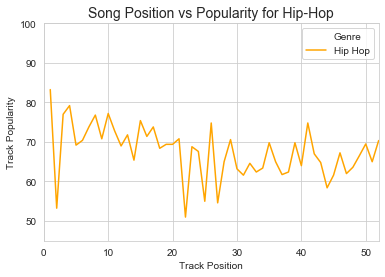

In [15]:
# Basic lineplot for trend of specific genres song popularity against track position
snsplot=sns.lineplot(x='Track Position', y='Track Popularity', hue='Genre', data=gen_play, palette=color_dict)

#Set Axis limits
plt.ylim(45, 100)
plt.xlim(0, 52)#limited to 52 since only two playlists had more than 50 songs in the Hip Hop Genre
plt.title("Song Position vs Popularity for Hip-Hop", size=14)

#Display figure
fig=snsplot.get_figure()

#Save output figure
fig.savefig("plots/HipHop_TrackPosition_Popularity.png", dpi=200)

### Position of "Rap Caviar" Songs & their Popularity 

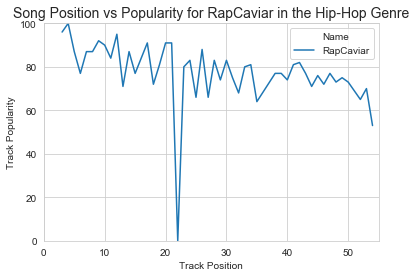

In [59]:
# Set dataframe and group by playlist ID
play_df = merged_music_data.groupby(['Playlist ID'])
# Set dataframe to one specific playlist ID (the Rap Caviar playlist)
play_df = play_df.get_group('37i9dQZF1DX0XUsuxWHRQd')

# Basic lineplot for trend of specific playlists song popularity against track position
snsplot=sns.lineplot(x='Track Position', y='Track Popularity', hue='Name', data=play_df)
fig=snsplot.get_figure()
plt.ylim(0, 100)
plt.xlim(0, 55)
plt.title("Song Position vs Popularity for RapCaviar in the Hip-Hop Genre", size=14)
fig.savefig("plots/Rap_Caviar_TrackPosition_Popularity.png", dpi=200)

## Does the Duration of Songs affect their Position/Rank within the Playlists?  

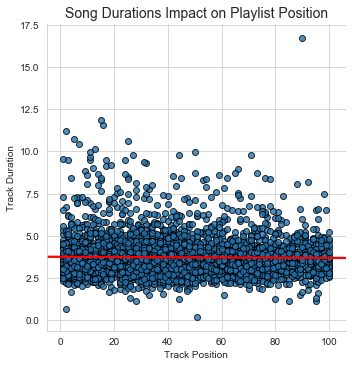

In [55]:
# set gridmarks
sns.set_style('whitegrid') 
# basic scatterplot
fig = sns.lmplot(x="Track Position", y="Track Duration", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Song Durations Impact on Playlist Position", size=14)

# Axis limits
#plt.ylim(-1, 13)
#plt.xlim(-3, 110)

# Show Plot
plt.show()

# Save output figure
fig.savefig("plots/Track_Duration_Track_Position.png", dpi=200)

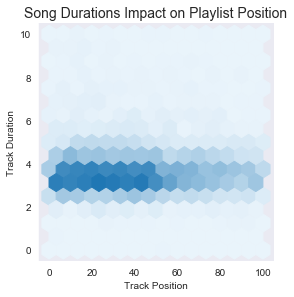

In [56]:
#Define hexbin
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
# establish hexbin heat map for duration and popularity
with sns.axes_style("dark"):
    g = sns.FacetGrid(merged_music_data, height=4)
g.map(hexbin, "Track Position", "Track Duration", extent=[0, 100, 0, 10]);
plt.title("Song Durations Impact on Playlist Position", size=14)
#Save output figure
g.savefig("plots/Track_Duration_Position_Hex.png", dpi=200)

## Does the Duration of Songs affect their Popularity?  

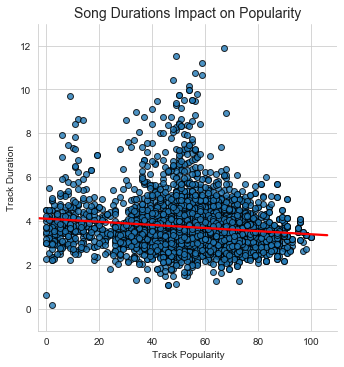

In [52]:
# set gridmarks
sns.set_style('whitegrid') 
# basic scatterplot
fig = sns.lmplot(x="Track Popularity", y="Track Duration", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Song Durations Impact on Popularity", size=14)

# Axis limits
plt.ylim(-1, 13)
plt.xlim(-3, 110)

# Show Plot
plt.show()

# Save output figure
fig.savefig("plots/Track_Duration_Popularity.png", dpi=200)

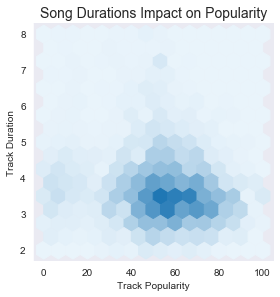

In [53]:
#Define hexbin
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)
# establish hexbin heat map for duration and popularity
with sns.axes_style("dark"):
    g = sns.FacetGrid(merged_music_data, height=4)
g.map(hexbin, "Track Popularity", "Track Duration", extent=[0, 100, 2, 8]);
plt.title("Song Durations Impact on Popularity", size=14)
#Save output figure
g.savefig("plots/Track_Duration_Popularity_Hex.png", dpi=200)

## How do various Audio Features of Songs influence their Popularity across the different Genres? 

### Sample Set Popularity vs Acousticness

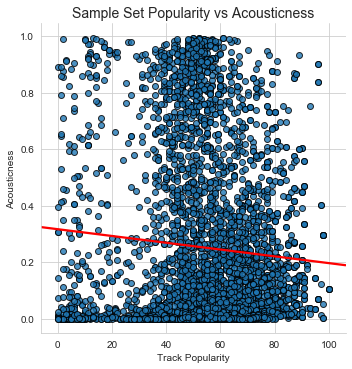

In [20]:
# Wrapped scatter plot of "Track Popularity" v "Acousticness" for the sample set
fig = sns.lmplot("Track Popularity", "Acousticness", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Sample Set Popularity vs Acousticness", size=14)
# Save output figure
fig.savefig("plots/Sample_Track_Acousticness_Popularity.png", dpi=200)

### Sample Set Popularity vs Danceability

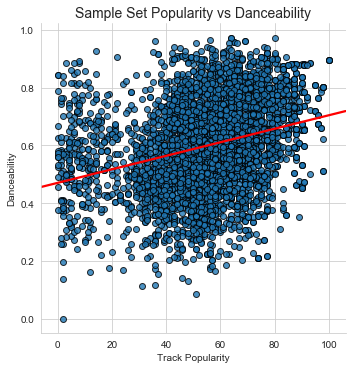

In [21]:
# Wrapped scatter plot of "Track Popularity" v "Danceability" for the sample set
fig = sns.lmplot("Track Popularity", "Danceability", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Sample Set Popularity vs Danceability", size=14)

# Save output figure
fig.savefig("plots/Sample_Track_Danceability_Popularity.png", dpi=200)

### Sample Set Popularity vs Energy

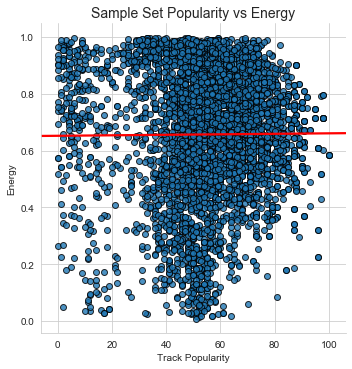

In [22]:
# Wrapped scatter plot of "Track Popularity" v "Energy" for the sample set
fig = sns.lmplot("Track Popularity", "Energy", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Sample Set Popularity vs Energy", size=14)

# Save output figure
fig.savefig("plots/Sample_Track_Energy_Popularity.png", dpi=200)

### Sample Set Popularity vs Instrumentalness

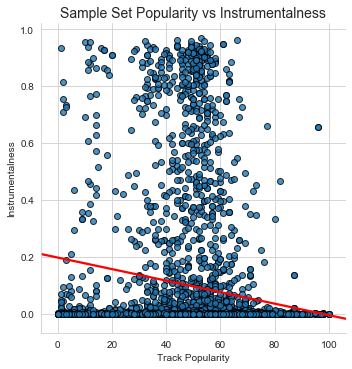

In [23]:
# Wrapped scatter plot of "Track Popularity" v "Instrumentalness" for the sample set
fig = sns.lmplot("Track Popularity", "Instrumentalness", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Sample Set Popularity vs Instrumentalness", size=14)

# Save output figure
fig.savefig("plots/Sample_Track_Instrumentalness_Popularity.png", dpi=200)

### Sample Set Popularity vs Liveness

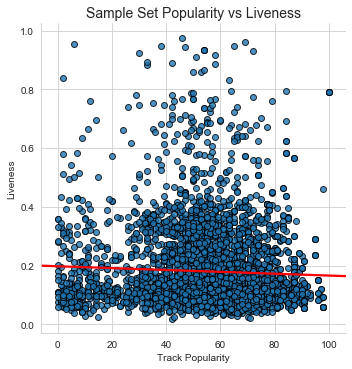

In [24]:
# Wrapped scatter plot of "Track Popularity" v "Liveness" for the sample set
fig = sns.lmplot("Track Popularity", "Liveness", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Sample Set Popularity vs Liveness", size=14)

# Save output figure
fig.savefig("plots/Sample_Track_Liveness_Popularity.png", dpi=200)

### Sample Set Popularity vs Loudness

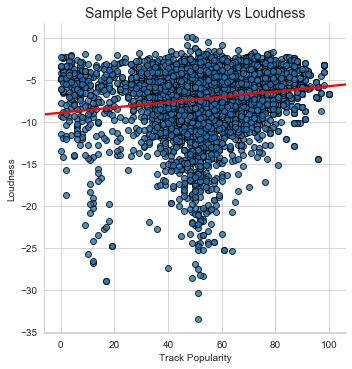

In [25]:
# Wrapped scatter plot of "Track Popularity" v "Loudness" for the sample set
fig = sns.lmplot("Track Popularity", "Loudness", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Sample Set Popularity vs Loudness", size=14)

# Save output figure
fig.savefig("plots/Sample_Track_Loudness_Popularity.png", dpi=200)

### Sample Set Popularity vs Speechiness

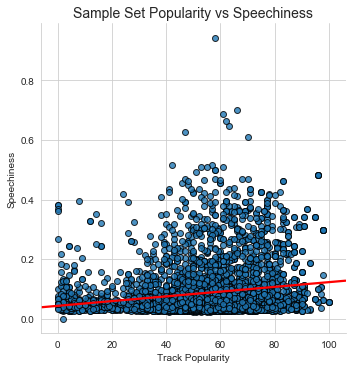

In [26]:
# Wrapped scatter plot of "Track Popularity" v "Speechiness" for the sample set
fig = sns.lmplot("Track Popularity", "Speechiness", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Sample Set Popularity vs Speechiness", size=14)

# Save output figure
fig.savefig("plots/Sample_Track_Speechiness_Popularity.png", dpi=200)

### Sample Set Popularity vs Valence

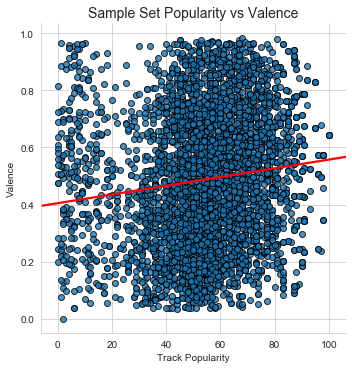

In [27]:
# Wrapped scatter plot of "Track Popularity" v "Valence" for the sample set
fig = sns.lmplot("Track Popularity", "Valence", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Sample Set Popularity vs Valence", size=14)

# Save output figure
fig.savefig("plots/Sample_Track_Valence_Popularity.png", dpi=200)

### Sample Set Popularity vs Tempo

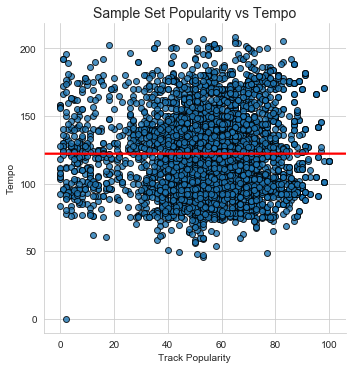

In [28]:
# Wrapped scatter plot of "Track Popularity" v "Tempo" for the sample set
fig = sns.lmplot("Track Popularity", "Tempo", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Sample Set Popularity vs Tempo", size=14)

# Save output figure
fig.savefig("plots/Sample_Track_Tempo_Popularity.png", dpi=200)

### Acousticness vs Popularity

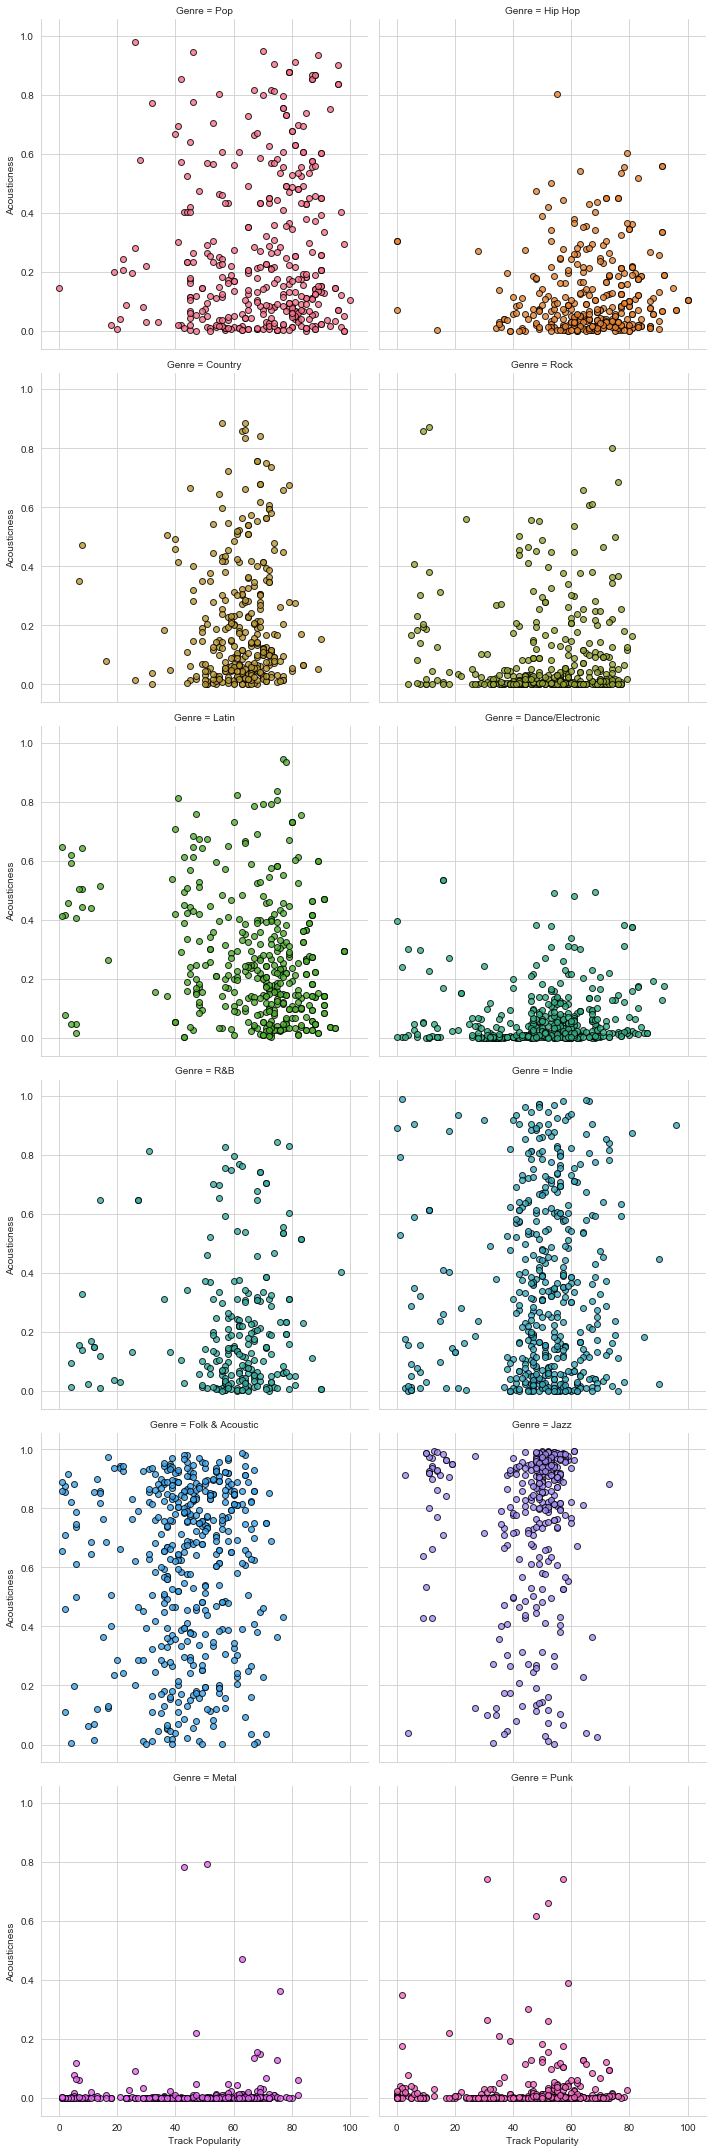

In [29]:
# Wrapped scatter plot of "Track Popularity" v "Acousticness" for each genre
fig = sns.lmplot("Track Popularity", "Acousticness", data=merged_music_data, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

# Save output figure
fig.savefig("plots/Genre_Track_Acousticness_Popularity.png", dpi=200)

### Danceability vs Popularity

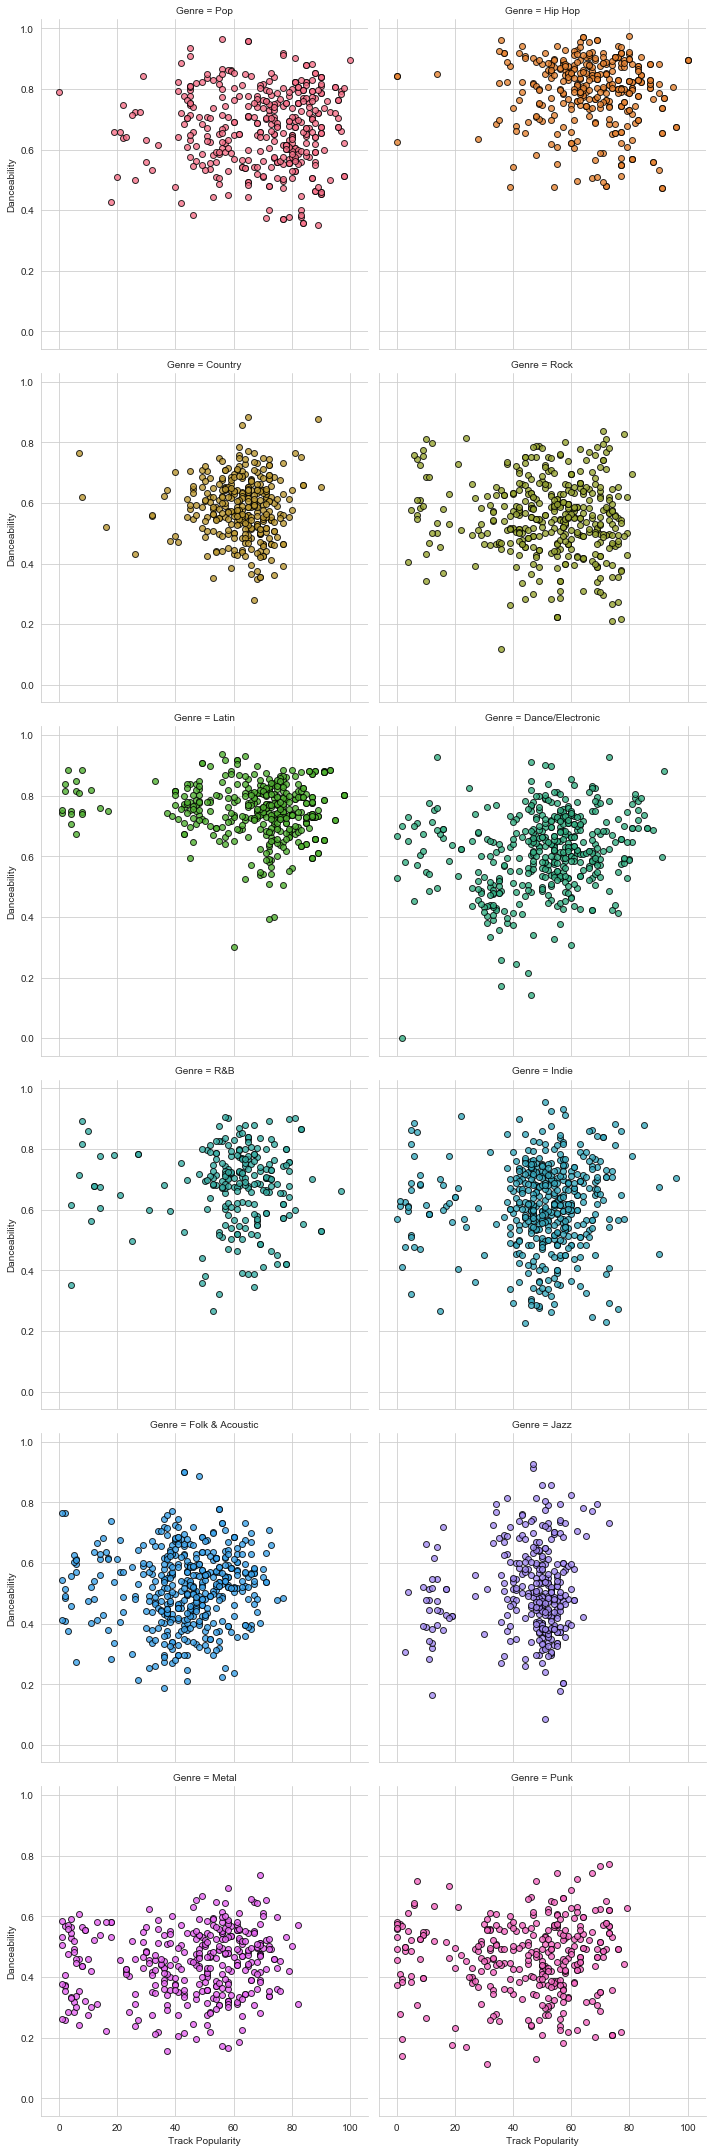

In [30]:
# Wrapped scatter plot of "Track Popularity" v "Danceability" for each genre
fig = sns.lmplot("Track Popularity", "Danceability", data=merged_music_data, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

# Save output figure
fig.savefig("plots/Genre_Track_Danceability_Popularity.png", dpi=200)

### Energy vs Popularity

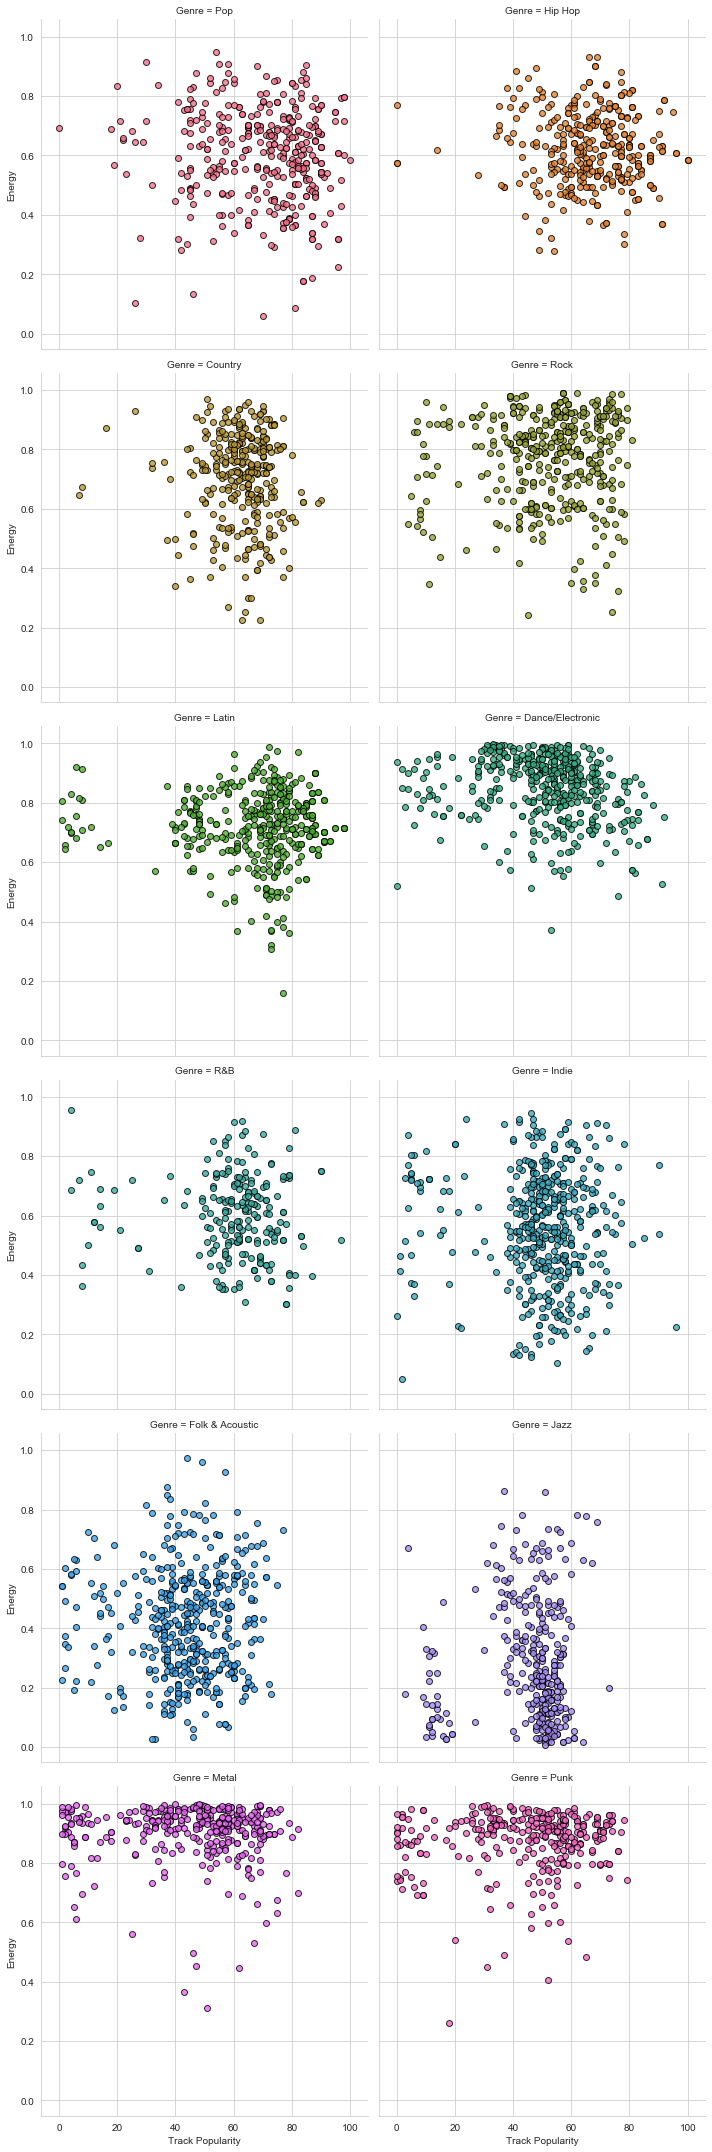

In [31]:
# Wrapped scatter plot of "Track Popularity" v "Energy" for each genre
fig = sns.lmplot("Track Popularity", "Energy", data=merged_music_data, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

# Save output figure
fig.savefig("plots/Genre_Track_Energy_Popularity.png", dpi=200)

### Instrumentalness vs Popularity

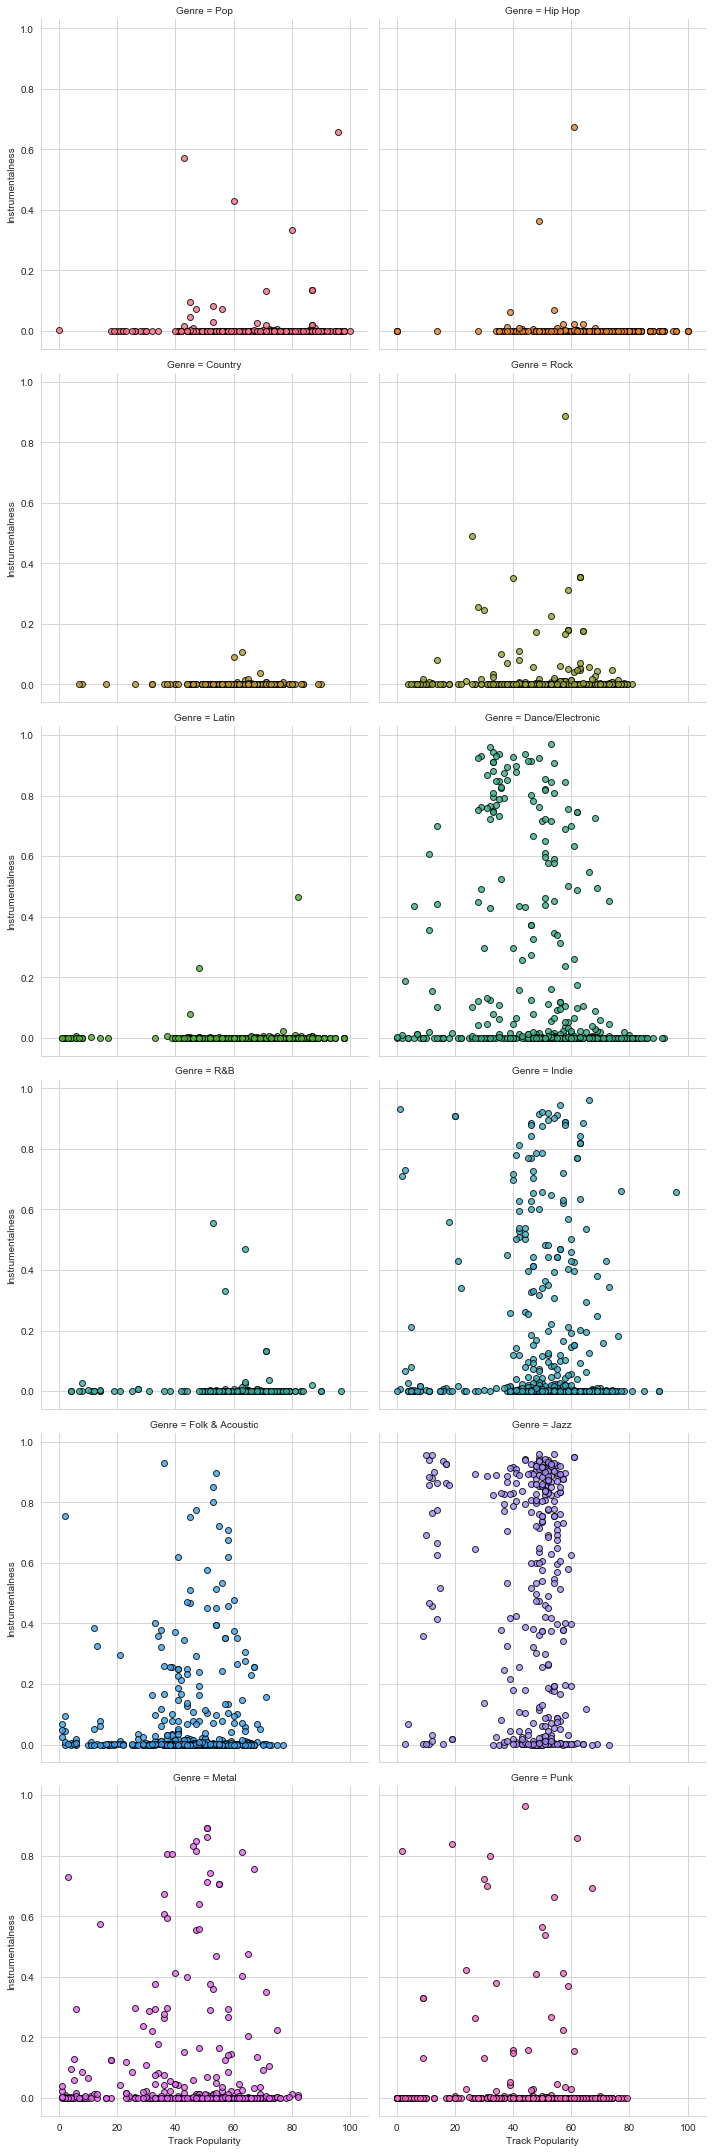

In [32]:
#wrapped scatter plot of "Track Popularity" v "Instrumentalness" for each genre
fig = sns.lmplot("Track Popularity", "Instrumentalness", data=merged_music_data, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("plots/Genre_Track_Instrumentalness_Popularity.png", dpi=200)

### Liveness vs Popularity

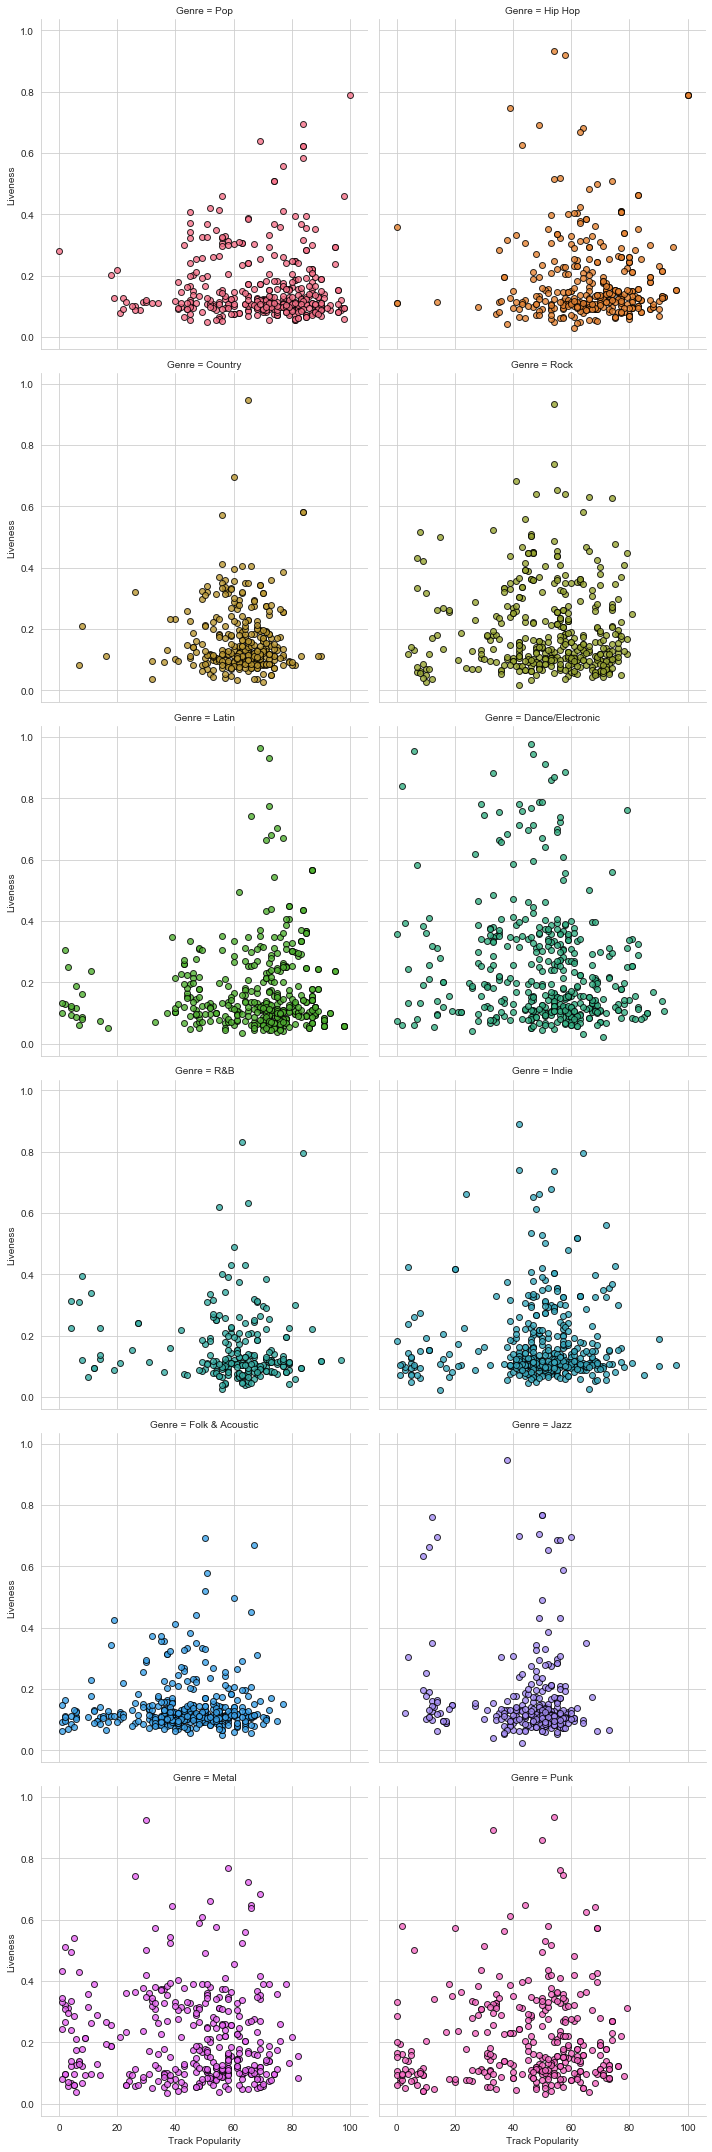

In [33]:
#wrapped scatter plot of "Track Popularity" v "Liveness" for each genre
fig = sns.lmplot("Track Popularity", "Liveness", data=merged_music_data, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("plots/Genre_Track_Liveness_Popularity.png", dpi=200)

### Loudness vs Popularity

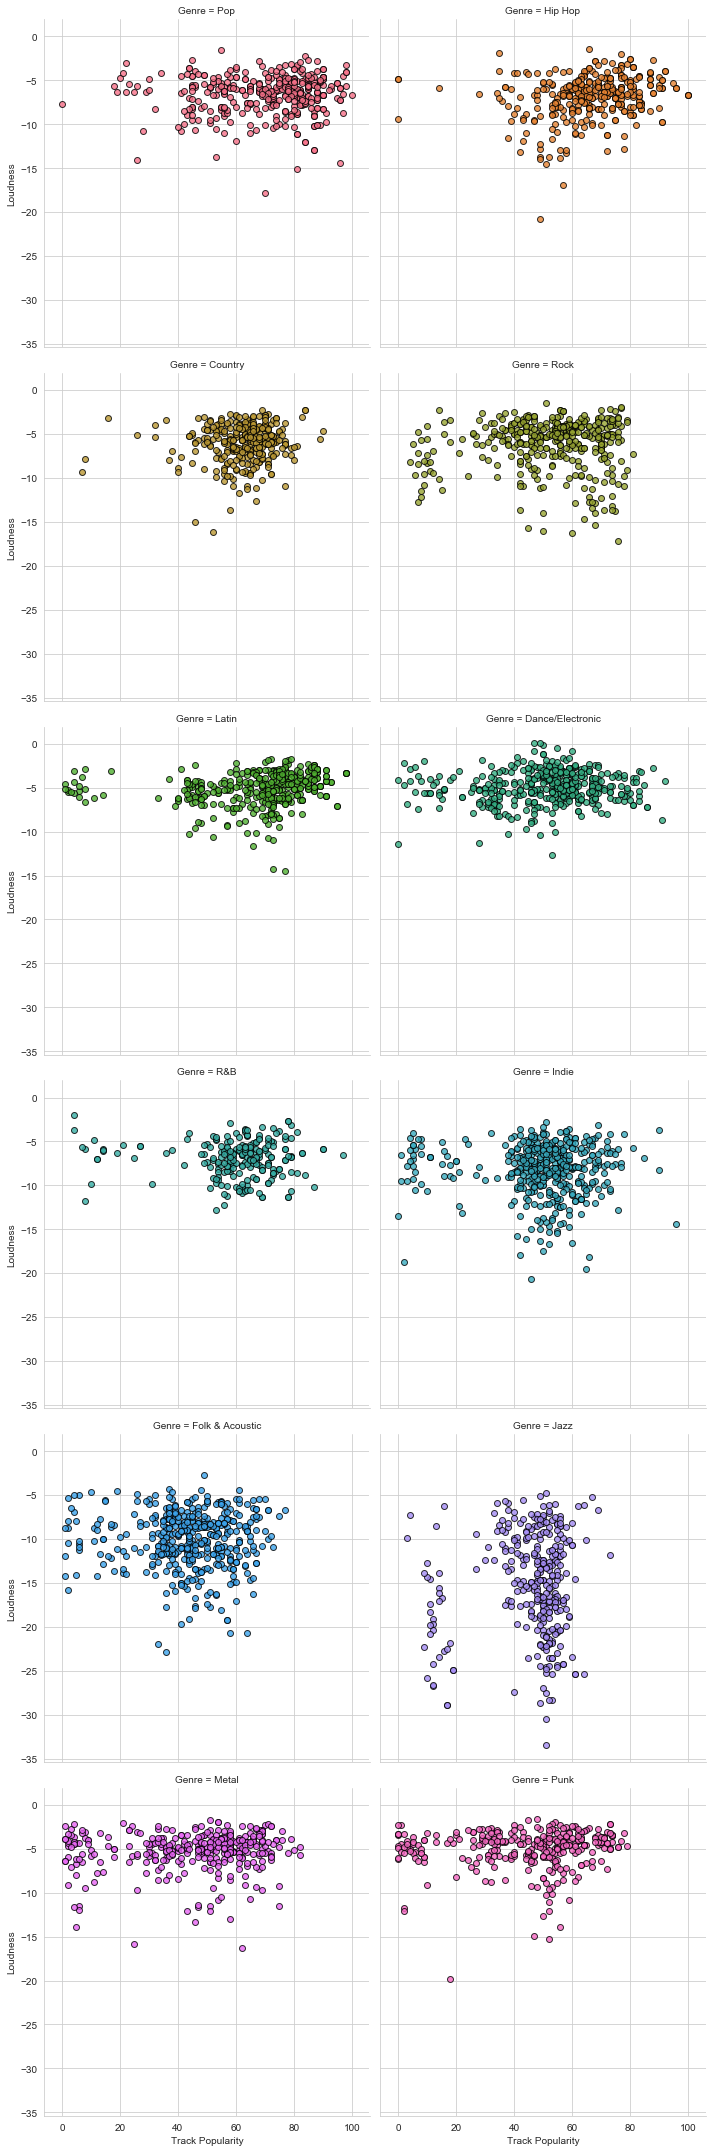

In [34]:
#wrapped scatter plot of "Track Popularity" v "Loudness" for each genre
fig = sns.lmplot("Track Popularity", "Loudness", data=merged_music_data, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("plots/Genre_Track_Loudness_Popularity.png", dpi=200)

### Speechineness vs Popularity

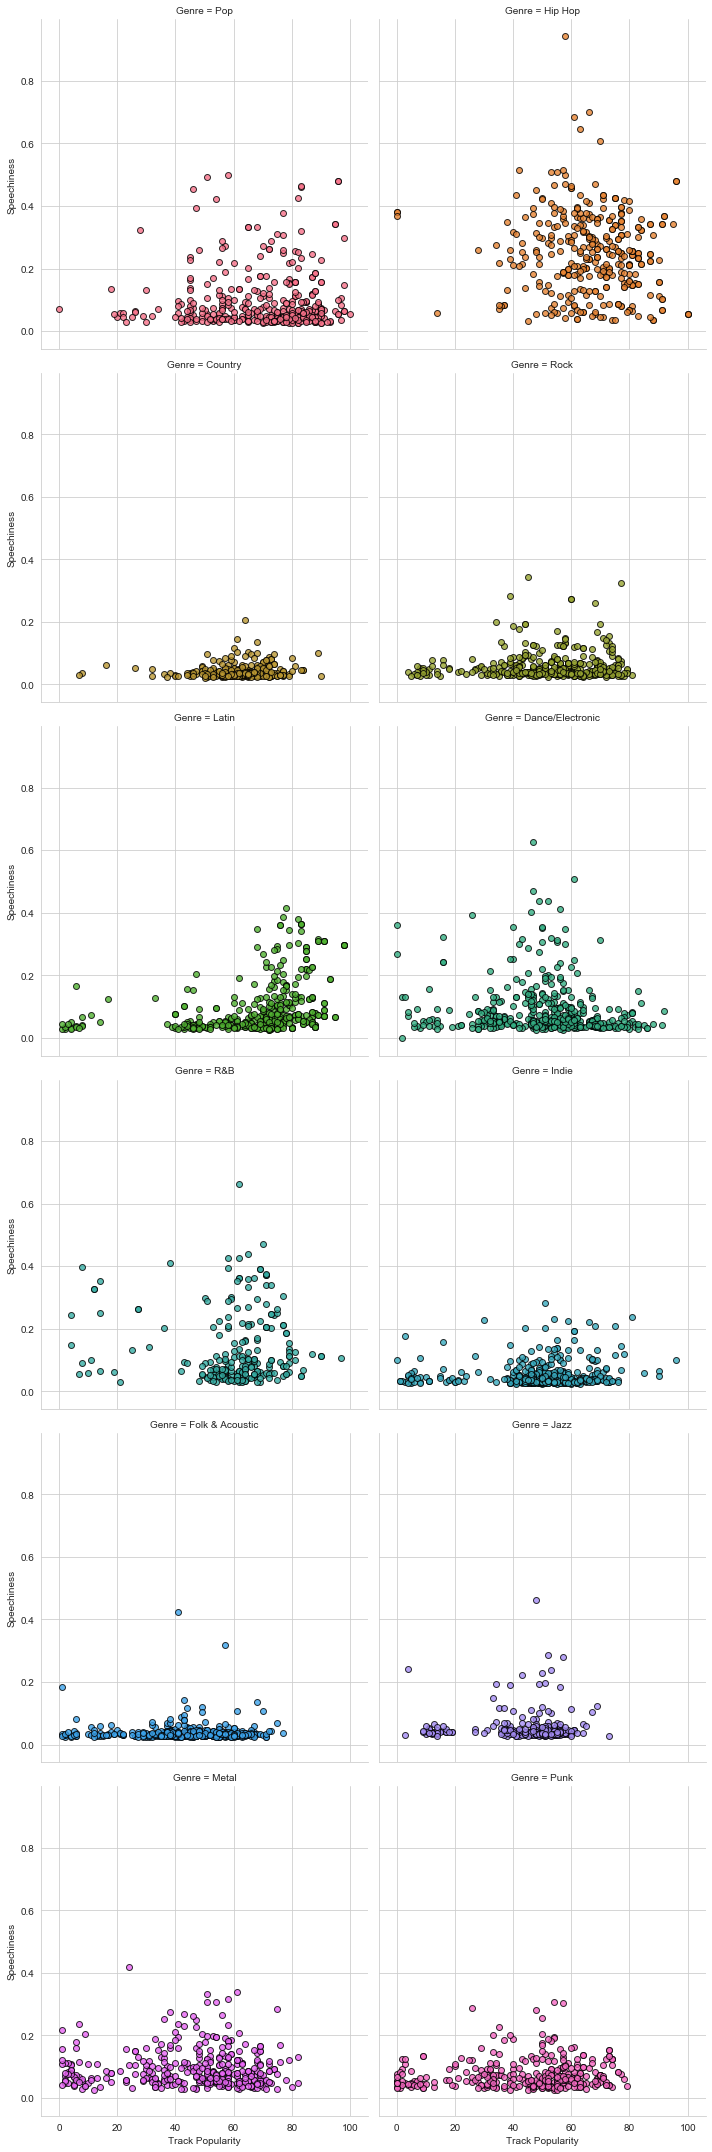

In [35]:
#wrapped scatter plot of "Track Popularity" v "Speechiness" for each genre
fig = sns.lmplot("Track Popularity", "Speechiness", data=merged_music_data, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("plots/Genre_Track_Speechiness_Popularity.png", dpi=200)

### Valence vs Popularity

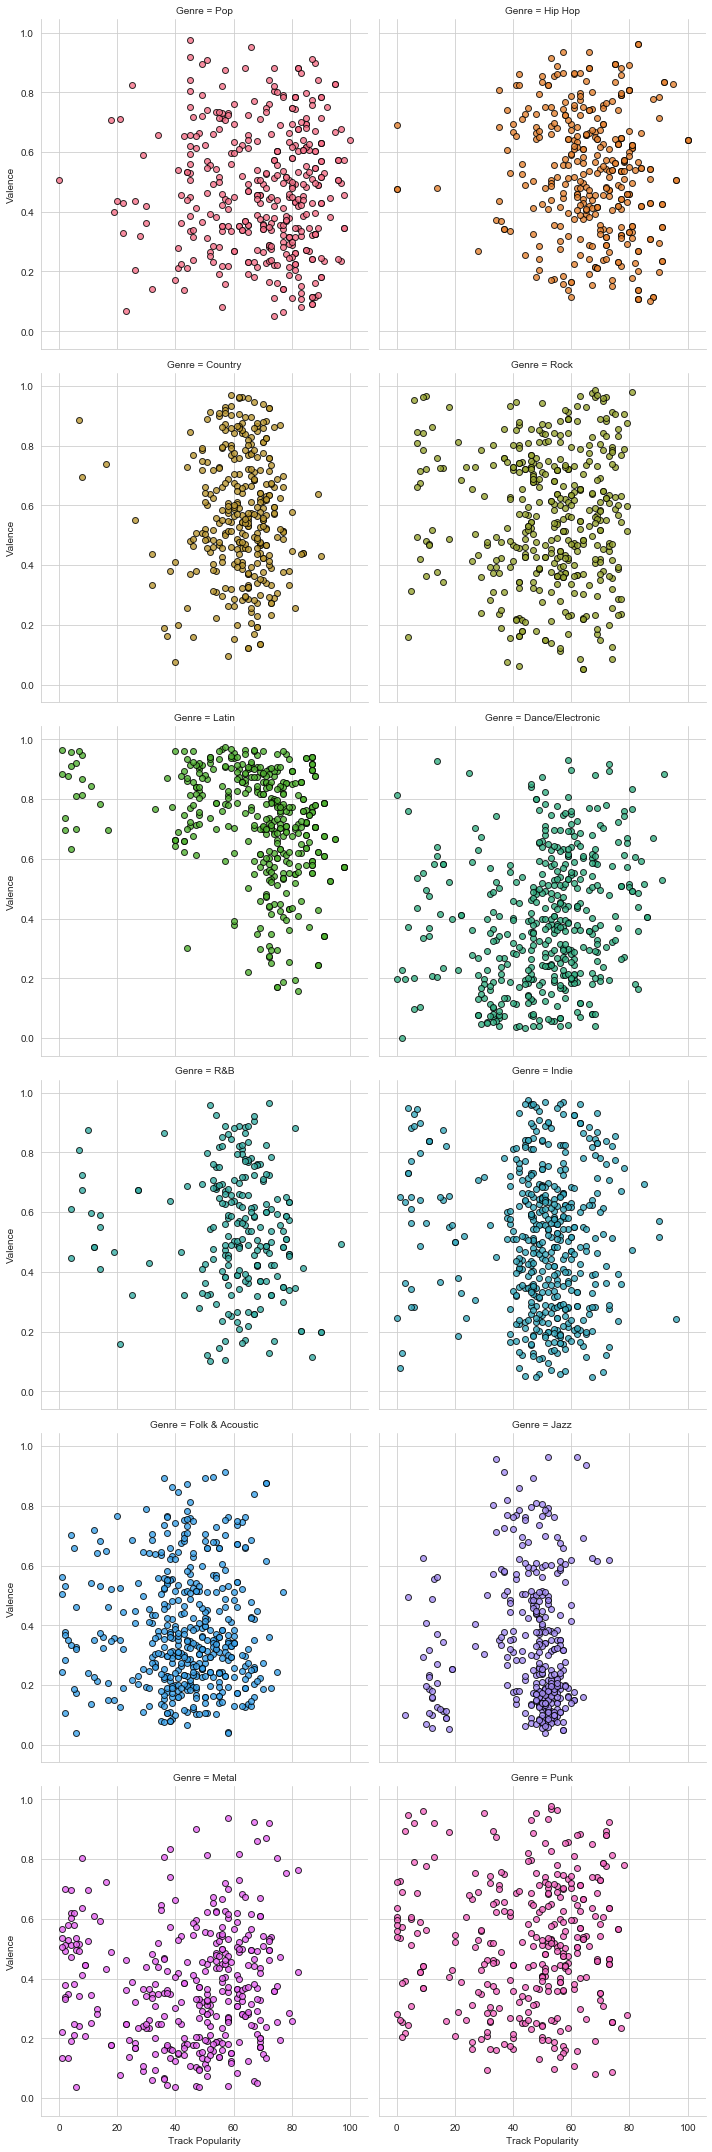

In [36]:
#wrapped scatter plot of "Track Popularity" v "Valence" for each genre
fig = sns.lmplot("Track Popularity", "Valence", data=merged_music_data, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("plots/Genre_Track_Valence_Popularity.png", dpi=200)

### Tempo vs Popularity

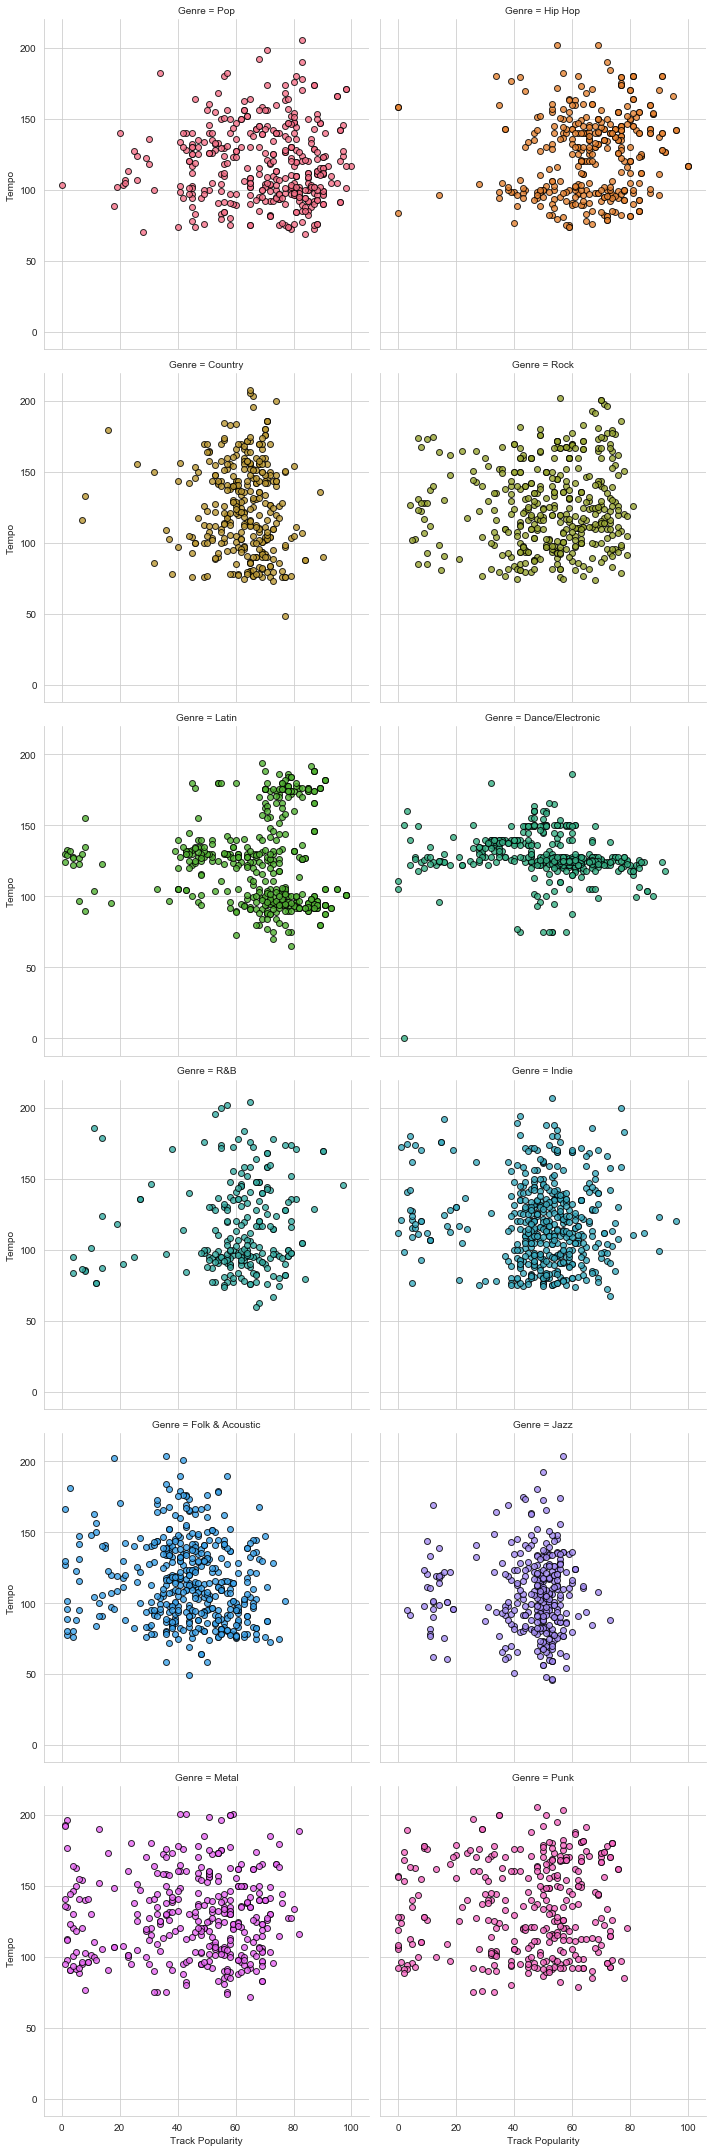

In [37]:
#wrapped scatter plot of "Track Popularity" v "Tempo" for each genre
fig = sns.lmplot("Track Popularity", "Tempo", data=merged_music_data, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})

#Save output figure
fig.savefig("plots/Genre_Track_Tempo_Popularity.png", dpi=200)

## How are Popular Songs trending in terms of their Valence across different Genres?
* Analysis of songs that sound more positive (e.g. happy, cheerful, euphoric) vs songs that sound more negative (e.g. sad, depressed, angry)?

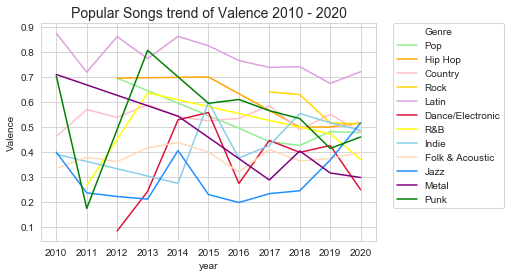

In [38]:
# Insert column and convert Release Date to year only, store in new column
merged_music_data['year'] = pd.DatetimeIndex(merged_music_data['Release Date']).year
# DataFrame to filter only to release dates for 2010 or newer
merged_music_data_10 = merged_music_data[(merged_music_data["year"] >= 2010)]

# Basic scatterplot to trend Valence (song positivity) v year of release
snsplot=sns.lineplot(x='year', y='Valence', hue='Genre', data=merged_music_data_10, palette=color_dict,err_style=None)
plt.title("Popular Songs trend of Valence 2010 - 2020", size=14)
snsplot.set_xticks([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

# move legend outside of chart
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# plot figure
fig=snsplot.get_figure()

#export figure
fig.savefig("plots/Valence_Genre_Year.png", dpi=200, bbox_inches="tight")

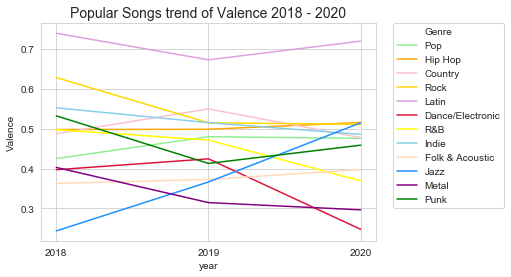

In [39]:
#reduce df to prior three years to zoom in on trend
merged_music_data_18 = merged_music_data[(merged_music_data["year"] >= 2018)]

# basic scatterplot to trend Valence (song positivity) v year of release
snsplot=sns.lineplot(x='year', y='Valence', hue='Genre', data=merged_music_data_18, palette=color_dict,err_style=None)
plt.title("Popular Songs trend of Valence 2018 - 2020", size=14)
snsplot.set_xticks([2018, 2019, 2020])

# move legend outside of chart
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plot figure
fig=snsplot.get_figure()

#export figure
fig.savefig("plots/Genre_Valence_Year_ZoomIn.png", dpi=200, bbox_inches="tight")

### Correlating Speechiness vs Valence of Songs (Overall and not Genre-specific)

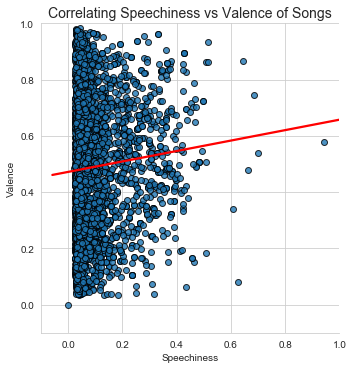

In [40]:
# set gridmarks
sns.set_style('whitegrid') 
# basic scatterplot
fig = sns.lmplot(x="Speechiness", y="Valence", data=merged_music_data, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'},line_kws={'color': 'red'})
plt.title("Correlating Speechiness vs Valence of Songs", size=14)

# Axis limits
plt.ylim(-.1, 1)
plt.xlim(-.1, 1)
#Show Plot
plt.show()
#Save output figure
fig.savefig("plots/Speechiness_Valence_Overall.png", dpi=200)

### Correlating Speechiness vs Valence of Songs (Genre-specific)

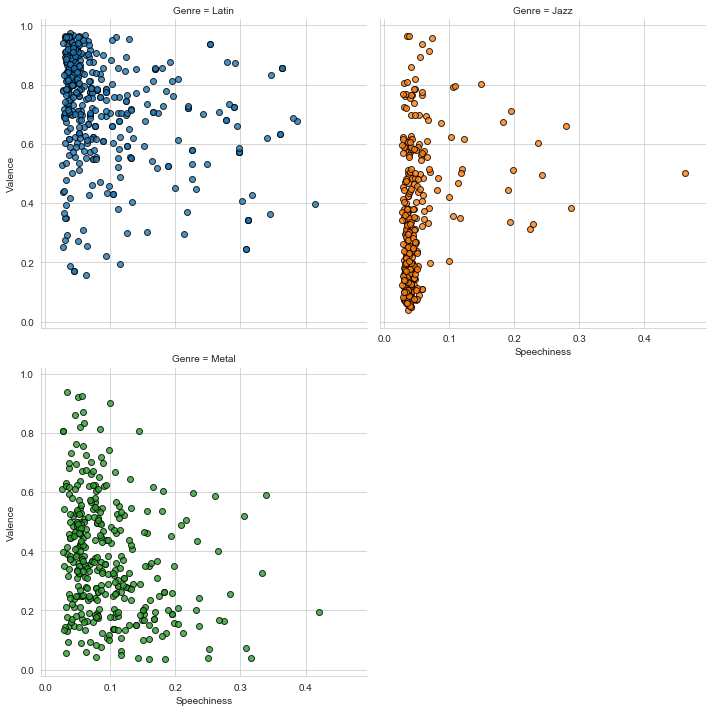

In [62]:
# DataFrame to filter only to release dates for 2010 or newer
merged_music_data_s_v = merged_music_data[(merged_music_data["Genre"].isin(['Metal', 'Latin','Jazz']))]

# wrapped scatter plot of "Speechiness" vs "Valence" for each Genre
fig = sns.lmplot("Speechiness", "Valence", data=merged_music_data_s_v, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})
# Save output figure
fig.savefig("plots/Speechiness_Valence_GenreSpecific.png", dpi=200)